In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

In [2]:
data = pd.read_csv('train.csv', index_col=0)

In [3]:
data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 80)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
f = open("data_description.txt", "r")
print(f.read())


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

##### Biểu đồ tương quan

Text(0.5, 1.0, 'Biểu đồ tương quan giữa các thuộc tính của data')

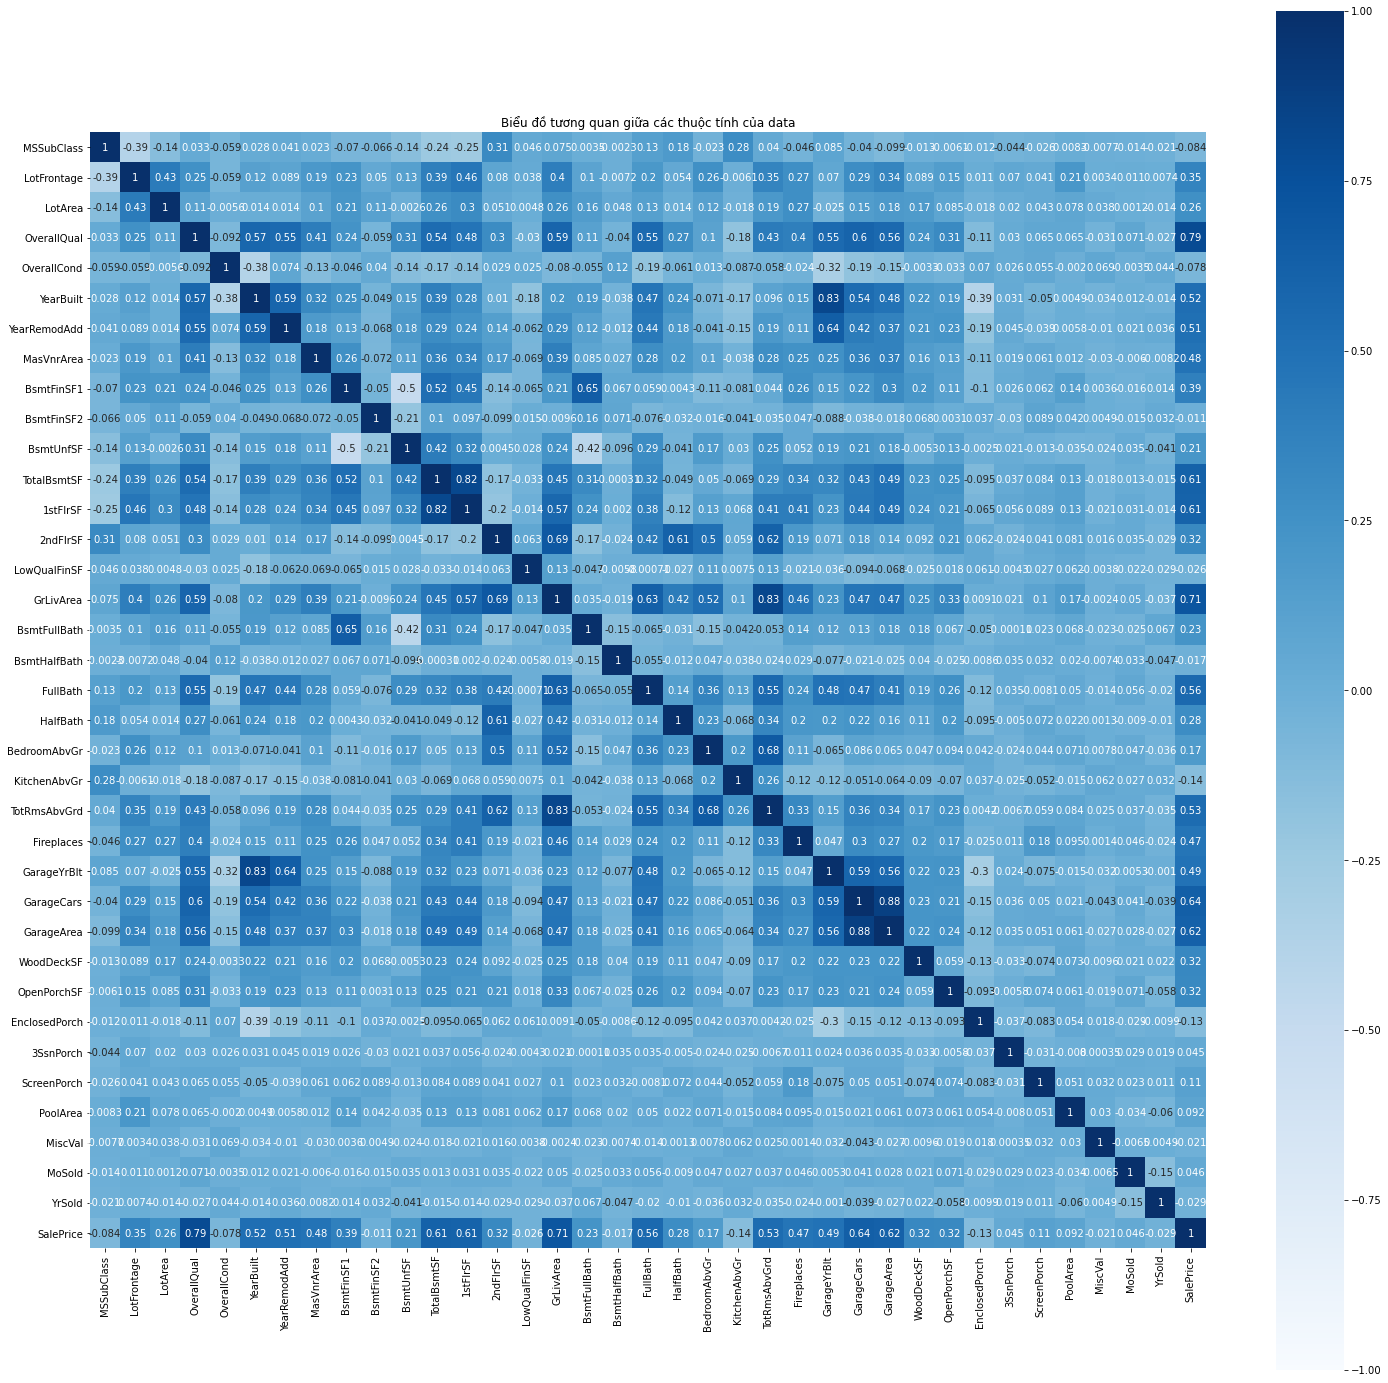

In [8]:
plt.figure(figsize=(25,25))
data_corr = data.corr(method='pearson')
sns.heatmap(data = data_corr,center = 0, vmin= -1,vmax = 1,annot = True, square=True,cmap = 'Blues')
plt.title('Biểu đồ tương quan giữa các thuộc tính của data')

- Thuộc tính MSSubClass: Thuộc tính này biểu diễn loại nhà nên chuyển thuộc tính sang dạng categorical.
- Thuộc tính MoSold và YrSold cũng sẽ được chuyển sang dạng categorical.

In [9]:
for col in ('MSSubClass', 'YrSold', 'MoSold'):
    data[col] = data[col].astype(str)

- Các thuộc sau sẽ được chuyển thành dạng số có thứ tự: `['Alley', 'LotShape', 'LandContour', 'LandSlope', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'HeatingQC', 'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond','PavedDrive', 'Fence']`.

In [10]:
col1s = 'HeatingQC','KitchenQual','ExterQual','ExterCond','FireplaceQu','BsmtQual','BsmtCond','GarageQual','GarageCond'
for col in col1s:
    data[col] = data[col].replace(to_replace=['Ex','Gd','TA','Fa','Po',np.nan], value=[5,4,3,2,1,0])
    
data['Alley'] = data['Alley'].replace(to_replace=['Grvl','Pave',np.nan], value=[1,2,0])
data['LotShape'] = data['LotShape'].replace(to_replace=['Reg','IR1','IR2','IR3'],value=[4,3,2,1])
data['LandContour'] = data['LandContour'].replace(to_replace=['Lvl','Bnk','HLS','Low'], value=[2,3,1,0])
data['LandSlope'] = data['LandSlope'].replace(to_replace=['Gtl','Mod','Sev'], value=[2,1,0])
data['RoofMatl'] = data['RoofMatl'].replace(to_replace=['ClyTile','CompShg','Membran','Metal',\
                                                        'Roll','Tar&Grv','WdShake','WdShngl'], value=[2,4,1,1,1,3,1,1])

data['BsmtExposure'] = data['BsmtExposure'].replace(to_replace=['Gd','Av','Mn','No',np.nan], value=[4,3,2,1,0])
data['BsmtFinType1'] = data['BsmtFinType1'].replace(to_replace=['GLQ','ALQ','BLQ','Rec','LwQ','Unf',np.nan],\
                                                    value=[6,5,4,3,2,1,0])
data['BsmtFinType2'] = data['BsmtFinType2'].replace(to_replace=['GLQ','ALQ','BLQ','Rec','LwQ','Unf',np.nan]\
                                                    , value=[6,5,4,3,2,1,0])
data['Functional'] = data['Functional'].replace(to_replace=['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],\
                                                value=[5,2,2,3,4,4,0,1])
data['GarageType'] = data['GarageType'].replace(to_replace=['2Types','Attchd','Basment','BuiltIn','CarPort','Detchd',np.nan],\
                                                value=[1,2,2,2,2,1,0])
data['GarageFinish'] =data['GarageFinish'].replace(to_replace=['Fin','RFn','Unf',np.nan],value=[3,2,1,0])
data['PavedDrive'] = data['PavedDrive'].replace(to_replace=['Y','P','N'], value=[2,1,0])
data['Fence'] = data['Fence'].replace(to_replace=['GdPrv','MnPrv','GdWo','MnWw',np.nan], value=[4,3,2,1,0])
data['RoofStyle'] = data['RoofStyle'].replace(to_replace=['Flat','Gable','Gambrel','Hip','Mansard','Shed'],\
                                              value=[1,2,1,2,1,1])

In [11]:
print(data['Street'].value_counts())
print()
print(data['Utilities'].value_counts())

print("Missing PoolQC: ", data['PoolQC'].isna().mean()*100)

Pave    1454
Grvl       6
Name: Street, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Missing PoolQC:  99.52054794520548


- Thuộc tính `Street` và `Utilities` có chênh lệch rất lớn giữa hai giá trị nên bỏ 2 thuộc tính này.
- Thuộc tính `PoolQC` có missing quá lớn nên sẽ được bỏ. Thay vào đó sẽ thêm một thuộc tính `HasPool` thể hiện ngôi nhà này có <i>Hồ bơi</i>: Thuộc tính này có kiểu dữ liệu số và có giá trị là 1 và 0.

In [12]:
data['HasPool'] = data['PoolQC'].isna().apply(lambda x : 0 if x == True else 1)
data = data.drop(columns=['Street','Utilities','PoolQC'])

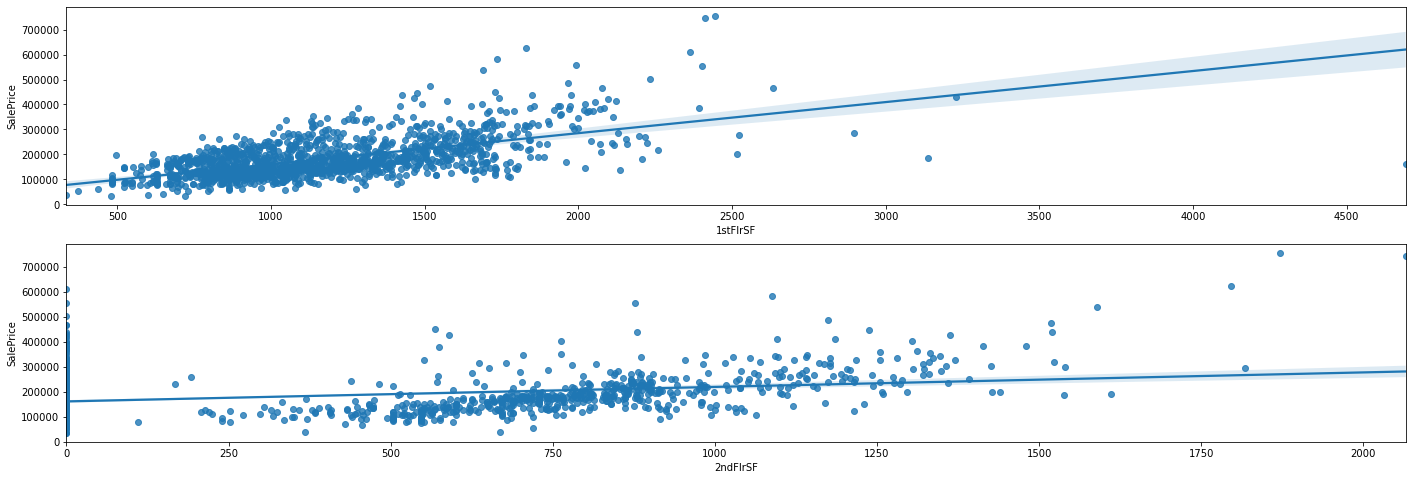

In [13]:
f, ax = plt.subplots(2,1,figsize = (24,8))
sns.regplot(data = data, x = '1stFlrSF', y ='SalePrice',ax = ax[0])
sns.regplot(data = data, x = '2ndFlrSF', y ='SalePrice',ax = ax[1])

- Lấy tổng diện tích tầng 1 và tầng 2 để tạo 1 thuộc tính mới tên là `SumFlrSF`

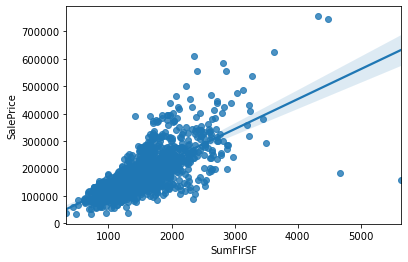

In [14]:
data['SumFlrSF'] = data['1stFlrSF'] + data['2ndFlrSF']
sns.regplot(data=data, x='SumFlrSF', y='SalePrice')

In [15]:
Cate_cols = data.select_dtypes(include='object').keys()
Cate_cols

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
data[Cate_cols].isna().sum()

MSSubClass          0
MSZoning            0
LotConfig           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
Foundation          0
Heating             0
CentralAir          0
Electrical          1
MiscFeature      1406
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
dtype: int64

- Các thuộc tính object sẽ được fillna với giá trị là `None`.

In [17]:
data[Cate_cols] = data[Cate_cols].fillna('None')

In [18]:
data[Cate_cols].isna().mean()

MSSubClass       0.0
MSZoning         0.0
LotConfig        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
Foundation       0.0
Heating          0.0
CentralAir       0.0
Electrical       0.0
MiscFeature      0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

In [19]:
Num_cols = data.keys().difference(Cate_cols)

In [20]:
data[Num_cols].isna().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley              0
BedroomAbvGr       0
BsmtCond           0
BsmtExposure       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtFinType1       0
BsmtFinType2       0
BsmtFullBath       0
BsmtHalfBath       0
BsmtQual           0
BsmtUnfSF          0
EnclosedPorch      0
ExterCond          0
ExterQual          0
Fence              0
FireplaceQu        0
Fireplaces         0
FullBath           0
Functional         0
GarageArea         0
GarageCars         0
GarageCond         0
GarageFinish       0
GarageQual         0
GarageType         0
GarageYrBlt       81
GrLivArea          0
HalfBath           0
HasPool            0
HeatingQC          0
KitchenAbvGr       0
KitchenQual        0
LandContour        0
LandSlope          0
LotArea            0
LotFrontage      259
LotShape           0
LowQualFinSF       0
MasVnrArea         8
MiscVal            0
OpenPorchSF        0
OverallCond        0
OverallQual        0
PavedDrive   

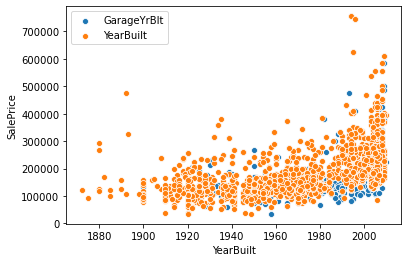

In [21]:
sns.scatterplot(data=data, x='GarageYrBlt',y='SalePrice', label = 'GarageYrBlt')
sns.scatterplot(data=data, x='YearBuilt',y='SalePrice',label = 'YearBuilt')

- Hai thuộc tính `GarageYrBlt` và `YearBuilt` có các giá trị rất tương đồng với nhau nên fillna ở thuộc tính `GarageYrBlt` bằng các giá trị tương ứng của thuộc tính `YearBuilt`. Thuộc tính `LotFrontage` sẽ được fillna bằng giá trị <b> 0 </b>

In [22]:
data['GarageYrBlt'].fillna(data['YearBuilt'],inplace = True)
data['LotFrontage'].fillna(0,inplace = True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   int64  
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl